In [4]:
%pip install pandas
%pip install numpy 
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import re as re
from collections import Counter

In [6]:
# Carregar cada CSV limpo
df_netflix = pd.read_csv('C:/Users/nise_/OneDrive/Documentos/Digital College/Python/DA_18/streaming/Dados_tratados/data_netflix_clean.csv')
df_hbo = pd.read_csv('C:/Users/nise_/OneDrive/Documentos/Digital College/Python/DA_18/streaming/Dados_tratados/data_hbo_clean.csv')
df_apple = pd.read_csv('C:/Users/nise_/OneDrive/Documentos/Digital College/Python/DA_18/streaming/Dados_tratados/df_apple_clean.csv')
df_prime = pd.read_csv('C:/Users/nise_/OneDrive/Documentos/Digital College/Python/DA_18/streaming/Dados_tratados/data_prime_video_clean.csv')


print("📂 DATASETS CARREGADOS:")
print(f"Netflix: {len(df_netflix):,} registros")
print(f"HBO Max: {len(df_hbo):,} registros") 
print(f"Apple TV: {len(df_apple):,} registros")
print(f"Prime Video: {len(df_prime):,} registros")

📂 DATASETS CARREGADOS:
Netflix: 21,391 registros
HBO Max: 9,776 registros
Apple TV: 18,692 registros
Prime Video: 72,943 registros


In [7]:
# Adicionar coluna de plataforma
df_netflix['platform'] = 'Netflix'
df_hbo['platform'] = 'HBO Max'
df_apple['platform'] = 'Apple TV+'
df_prime['platform'] = 'Prime Video'

In [8]:

# ==========================================
# UNINDO OS DATASETS
# ==========================================

platforms = {
    'Netflix': df_netflix,
    'HBO Max': df_hbo, 
    'Apple TV': df_apple,
    'Prime Video': df_prime
}
# Concatenar todos os DataFrames em um único DataFrame
df_streaming = pd.concat([df_netflix, df_hbo, df_apple, df_prime], ignore_index=True)


print(f"\n🎬 DATASET UNIFICADO CRIADO:")
print(f"Total de registros: {len(df_streaming):,}")
print(f"Total de colunas: {len(df_streaming.columns)}")
print(f"Colunas: {list(df_streaming.columns)}")



🎬 DATASET UNIFICADO CRIADO:
Total de registros: 122,802
Total de colunas: 8
Colunas: ['title', 'type', 'genres', 'releaseYear', 'imdbId', 'imdbAverageRating', 'imdbNumVotes', 'platform']


In [9]:
def extract_individual_genres(df, platform_name):
    """Extrai gêneros individuais e conta por plataforma"""
    all_genres = []
    
    for genres_str in df['genres'].dropna():
        if pd.notna(genres_str):
            genres_list = re.split(r'[,;|]', str(genres_str))
            clean_genres = [genre.strip() for genre in genres_list if genre.strip()]
            all_genres.extend(clean_genres)
    
    genre_counts = Counter(all_genres)
    total_occurrences = sum(genre_counts.values())
    
    # Converter para DataFrame com percentuais
    genre_df = pd.DataFrame(list(genre_counts.items()), columns=['genre', 'count'])
    genre_df['percentage'] = (genre_df['count'] / total_occurrences) * 100
    genre_df['platform'] = platform_name
    genre_df = genre_df.sort_values('percentage', ascending=False)
    
    return genre_df

In [10]:
# Extrair dados de gênero por plataforma
netflix_genres = extract_individual_genres(df_netflix, 'Netflix')
hbo_genres = extract_individual_genres(df_hbo, 'HBO Max')
apple_genres = extract_individual_genres(df_apple, 'Apple TV+')
prime_genres = extract_individual_genres(df_prime, 'Prime Video')

# Combinar dados de gêneros
all_genres_data = pd.concat([netflix_genres, hbo_genres, apple_genres, prime_genres], ignore_index=True)

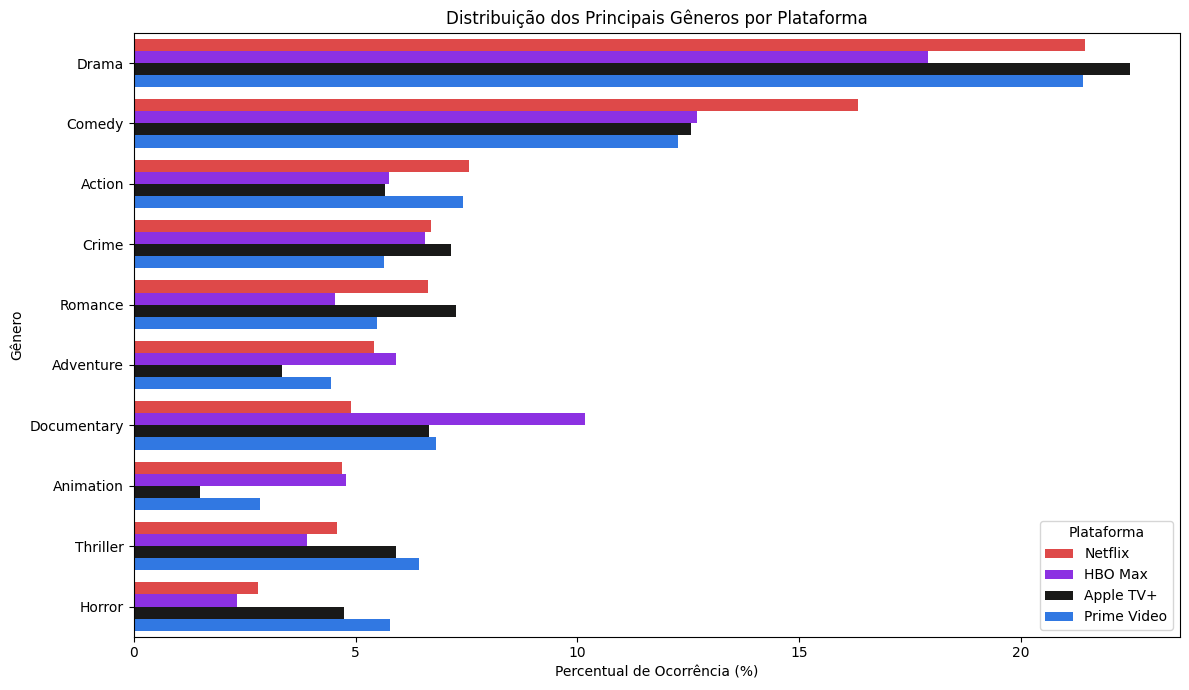

In [11]:
# ========================================================
# Gráfico de barras horizontais dos gêneros mais populares por plataforma
# ========================================================

# Foco só nos 10 gêneros mais populares 
top_genres = (
    all_genres_data.groupby('genre')['percentage']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filtra o dataframe para esses gêneros
df_plot = all_genres_data[all_genres_data['genre'].isin(top_genres)]

plt.figure(figsize=(12, 7))
sns.barplot(
    data=df_plot,
    y='genre',
    x='percentage',
    palette=["#F73030", "#8D14FF", "#191918", "#1472FF"],
    hue='platform',
    orient='h'
)
plt.xlabel('Percentual de Ocorrência (%)')
plt.ylabel('Gênero')
plt.title('Distribuição dos Principais Gêneros por Plataforma')
plt.legend(title='Plataforma')
plt.tight_layout()
plt.show()


In [12]:
# Gera uma tabela resumo dos 10 gêneros mais relevantes por plataforma
summary_table = all_genres_data.pivot_table(
    index='genre',
    columns='platform',
    values='percentage',
    aggfunc='sum'
).fillna(0)

# Ordena pelos gêneros mais representativos no total
summary_table['total'] = summary_table.sum(axis=1)
summary_table = summary_table.sort_values(by='total', ascending=False).drop(columns='total')

# Seleciona os 10 principais gêneros
top_10_genres = summary_table.head(10)

# Exibe de forma textual, arredondando para 2 casas decimais
print(top_10_genres.round(2).to_string())


platform     Apple TV+  HBO Max  Netflix  Prime Video
genre                                                
Drama            22.47    17.91    21.44        21.41
Comedy           12.58    12.70    16.32        12.27
Documentary       6.65    10.17     4.91         6.80
Action            5.67     5.76     7.57         7.43
Crime             7.15     6.57     6.71         5.65
Romance           7.27     4.54     6.63         5.49
Thriller          5.90     3.91     4.58         6.43
Adventure         3.34     5.92     5.41         4.44
Horror            4.75     2.34     2.80         5.78
Animation         1.48     4.79     4.69         2.86


In [13]:
# Gera a tabela resumo dos gêneros por plataforma
summary_table = all_genres_data.pivot_table(
    index='genre',
    columns='platform',
    values='percentage',
    aggfunc='sum'
).fillna(0)

# Soma os percentuais para ordenar
summary_table['total'] = summary_table.sum(axis=1)
summary_table = summary_table.sort_values(by='total', ascending=False).drop(columns='total')

# Seleciona os 10 principais gêneros
top_10_genres = summary_table.head(10)

# Gera o ranking textual com colocação
print("\n🏆 RANKING DOS 10 PRINCIPAIS GÊNEROS ENTRE TODAS AS PLATAFORMAS:")
ranking_text = "\n".join([f"{i+1}º {genre}" for i, genre in enumerate(top_10_genres.index)])

print(ranking_text)



🏆 RANKING DOS 10 PRINCIPAIS GÊNEROS ENTRE TODAS AS PLATAFORMAS:
1º Drama
2º Comedy
3º Documentary
4º Action
5º Crime
6º Romance
7º Thriller
8º Adventure
9º Horror
10º Animation
